# Clustering of clinical isolates

This notebook examines how clinical isolate samples cluster with PAO1 and PA14 strains using least stable core genes only

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import pandas as pd
import plotnine as pn
import seaborn as sns
from textwrap import fill
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scripts import paths

/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


## Load data

In [2]:
# Expression data pre-binning
pao1_expression_prebin_filename = paths.PAO1_PREBIN_COMPENDIUM
pa14_expression_prebin_filename = paths.PA14_PREBIN_COMPENDIUM

# SRA annotations
sra_annotation_filename = paths.SAMPLE_TO_STRAIN_PROCESSED

In [3]:
# Load SRA labels
sample_to_strain_df = pd.read_csv(
    sra_annotation_filename, sep="\t", index_col=0, header=0
)

sample_to_strain_df.head()

,Strain type
Experiment,
SRX5057740,NaN
SRX5057739,NaN
SRX5057910,NaN
SRX5057909,NaN
SRX3573046,PAO1


In [4]:
# Load compendium with all 2,333 samples mapped to PAO1, PA14 references
pao1_compendium = pd.read_csv(
    pao1_expression_prebin_filename, sep="\t", index_col=0, header=0
)
pa14_compendium = pd.read_csv(
    pa14_expression_prebin_filename, sep="\t", index_col=0, header=0
)

In [5]:
print(pao1_compendium.shape)
pao1_compendium.head()

(2333, 5563)


,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA1905,PA0195,PA4812,PA0195.1,PA0457.1,PA1552.1,PA1555.1,PA3701,PA4724.1,PA5471.1
ERX541571,5621.037929,902.172829,1380.825635,1811.863764,140.337996,508.725234,483.664878,666.605479,681.641693,77.687105,...,0.0,97.735390,471.134699,12.530178,87.711247,75.181069,77.687105,2288.010535,250.603564,0.000000
ERX541572,6323.898054,835.453446,1754.599065,1814.798699,190.876886,418.460865,321.554138,493.343336,666.600816,45.516796,...,0.0,80.755606,487.470201,10.277986,70.477619,46.985080,60.199633,2218.576726,199.686588,0.000000
ERX541573,4954.119979,893.818410,1984.802645,1752.146970,350.955170,362.785119,373.300630,465.311348,616.471815,42.062043,...,0.0,114.356179,782.091108,19.716583,153.789344,43.376482,106.469546,1474.800376,101.211790,0.000000
ERX541574,4603.356163,773.573295,2227.891090,1911.321096,311.809544,323.710671,435.581271,435.581271,506.988037,78.547442,...,0.0,152.334434,561.733224,21.422030,85.688119,38.083608,64.266089,2116.020491,78.547442,2.380226
ERX541575,4260.451254,875.408119,2140.106080,1788.361959,320.126671,288.509222,276.652679,577.018444,739.057871,57.306626,...,0.0,136.350249,677.799063,15.808725,195.632966,21.736996,118.565434,1650.035620,61.258807,0.000000


## Select least stable core genes

In [6]:
# Load transcriptional similarity df
# These are the subset of genes that we will consider
pao1_similarity_scores_filename = (
    "../3_core_core_analysis/pao1_core_similarity_associations_final_spell.tsv"
)
pa14_similarity_scores_filename = (
    "../3_core_core_analysis/pa14_core_similarity_associations_final_spell.tsv"
)

pao1_similarity_scores = pd.read_csv(
    pao1_similarity_scores_filename, sep="\t", header=0, index_col=0
)
pa14_similarity_scores = pd.read_csv(
    pa14_similarity_scores_filename, sep="\t", header=0, index_col=0
)

In [7]:
# Get least stable core genes
pao1_least_stable_genes = list(
    pao1_similarity_scores[pao1_similarity_scores["label"] == "least stable"].index
)
pa14_least_stable_genes = list(
    pa14_similarity_scores[pa14_similarity_scores["label"] == "least stable"].index
)

In [8]:
# Select least stable core genes
pao1_compendium_least = pao1_compendium[pao1_least_stable_genes]
pa14_compendium_least = pa14_compendium[pa14_least_stable_genes]

In [9]:
print(pao1_compendium_least.shape)
pao1_compendium_least.head()

(2333, 267)


,PA0251,PA3954,PA0190,PA1868,PA4905,PA1929,PA1653,PA4123,PA1268,PA1379,...,PA1502,PA1394,PA2343,PA0465,PA1954,PA1225,PA4508,PA4177,PA1486,PA2354
ERX541571,20.048285,120.289710,7.518107,57.638820,15.036214,25.060356,45.108641,32.578463,5.012071,10.024143,...,52.626748,37.590535,15.036214,102.747461,22.554321,20.048285,0.000000,25.060356,12.530178,27.566392
ERX541572,23.492540,67.541052,5.873135,73.414187,16.151121,29.365675,48.453363,33.770526,5.873135,13.214554,...,45.516796,88.097024,4.404851,102.779862,23.492540,26.429107,10.277986,29.365675,22.024256,10.277986
ERX541573,32.860971,42.062043,3.943317,65.721942,26.288777,9.201072,60.464187,97.268474,11.829950,9.201072,...,63.093064,57.835309,10.515511,80.180769,22.345460,34.175410,15.773266,10.515511,19.716583,9.201072
ERX541574,26.182481,80.927668,9.520902,49.984736,35.703383,11.901128,102.349698,90.448570,16.661579,11.901128,...,54.745187,16.661579,33.323157,109.490374,26.182481,47.604510,21.422030,19.041804,40.463834,14.281353
ERX541575,33.593540,67.187079,21.736996,65.210989,31.617449,11.856543,71.139260,71.139260,9.880453,13.832634,...,59.282717,41.497902,9.880453,92.876256,29.641358,27.665268,11.856543,19.760906,25.689177,27.665268


## Clustering

In [10]:
# Try 0-1 scaling for PCA
scaler = StandardScaler()

# Fitting
normalized_pao1_expression = scaler.fit_transform(pao1_compendium_least)
normalized_pa14_expression = scaler.fit_transform(pa14_compendium_least)

normalized_pao1_expression_df = pd.DataFrame(
    normalized_pao1_expression,
    columns=pao1_compendium_least.columns,
    index=pao1_compendium_least.index,
)

normalized_pa14_expression_df = pd.DataFrame(
    normalized_pa14_expression,
    columns=pa14_compendium_least.columns,
    index=pa14_compendium_least.index,
)

In [11]:
pca = PCA(n_components=2)
model_pca_pao1 = pca.fit(normalized_pao1_expression_df)

pao1_pca_encoded = model_pca_pao1.transform(normalized_pao1_expression_df)

In [12]:
pca = PCA(n_components=2)
model_pca_pa14 = pca.fit(normalized_pa14_expression_df)

pa14_pca_encoded = model_pca_pa14.transform(normalized_pa14_expression_df)

In [13]:
# Format
pao1_pca_encoded_df = pd.DataFrame(
    data=pao1_pca_encoded,
    index=pao1_compendium_least.index,
    columns=["1", "2"],
)

In [14]:
# Format
pa14_pca_encoded_df = pd.DataFrame(
    data=pa14_pca_encoded,
    index=pa14_compendium_least.index,
    columns=["1", "2"],
)

In [15]:
# Add strain labels
pao1_pca_encoded_label = pao1_pca_encoded_df.merge(
    sample_to_strain_df, left_index=True, right_index=True
)

In [16]:
pa14_pca_encoded_label = pa14_pca_encoded_df.merge(
    sample_to_strain_df, left_index=True, right_index=True
)

In [17]:
print(pao1_pca_encoded_label.shape)
pao1_pca_encoded_label.head()

(2333, 3)


,1,2,Strain type
ERX541571,-1.107296,0.298080,NaN
ERX541572,-1.474359,-0.190133,NaN
ERX541573,-0.936789,0.213210,NaN
ERX541574,0.551499,0.795428,NaN
ERX541575,-1.172777,0.379336,NaN


In [18]:
# Colors
edge_colors = {
    "Clinical Isolate": "#89A45E",
    "PA14": "#895881",
    # "PAK": "#EF8B46",
    "PAO1": "#C6A9B5",
    # "NA": "#D8DAEB",
    # "Other": "#808080"
}

/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


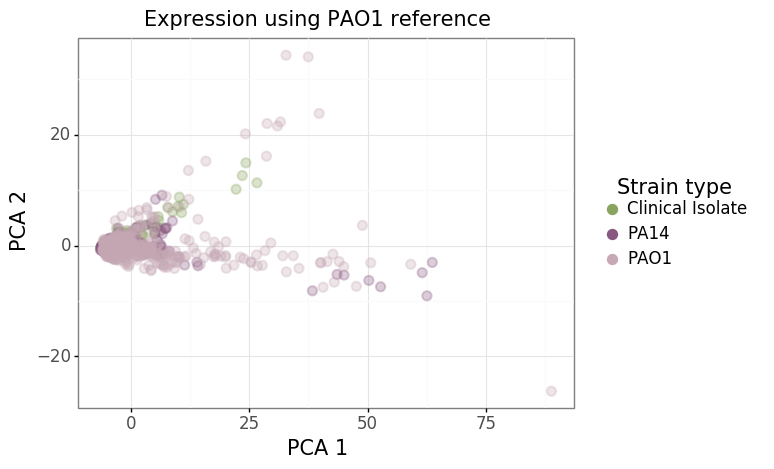

<ggplot: (8793342521197)>


In [19]:
# Plot gene expression in PAO1 reference

# Only plot PAO1, PA14 and clinical samples
pao1_pca_encoded_label_subset = pao1_pca_encoded_label[
    (pao1_pca_encoded_label["Strain type"] == "PAO1")
    | (pao1_pca_encoded_label["Strain type"] == "PA14")
    | (pao1_pca_encoded_label["Strain type"] == "Clinical Isolate")
]

fig1 = pn.ggplot(pao1_pca_encoded_label_subset, pn.aes(x="1", y="2"))
fig1 += pn.geom_point(pn.aes(color="Strain type"), alpha=0.3, size=3, stroke=0.8)
fig1 += pn.scale_color_manual(values=edge_colors)
fig1 += pn.labs(
    x="PCA 1",
    y="PCA 2",
    title="Expression using PAO1 reference",
)
fig1 += pn.theme_bw()
fig1 += pn.theme(
    legend_title_align="center",
    plot_background=pn.element_rect(fill="white"),
    legend_key=pn.element_rect(fill="white", colour="white"),
    legend_title=pn.element_text(family="sans-serif", size=15),
    legend_text=pn.element_text(family="sans-serif", size=12),
    plot_title=pn.element_text(family="sans-serif", size=15),
    axis_text=pn.element_text(family="sans-serif", size=12),
    axis_title=pn.element_text(family="sans-serif", size=15),
)
fig1 += pn.guides(colour=pn.guide_legend(override_aes={"alpha": 1}))

print(fig1)

/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


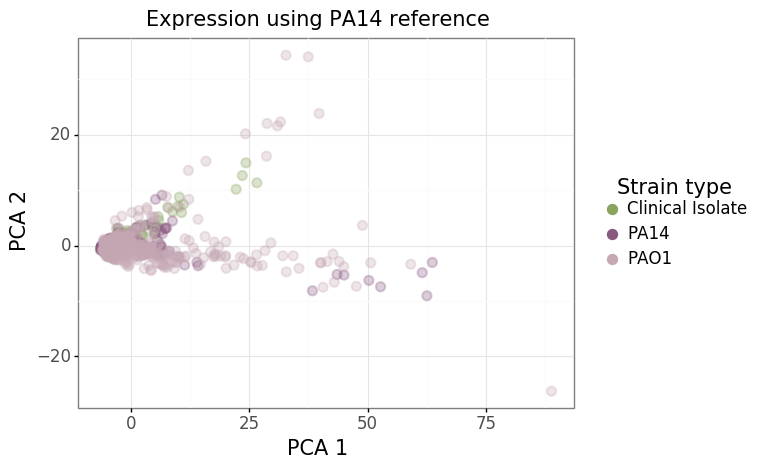

<ggplot: (8793344054773)>


In [20]:
# Plot gene expression in PA14 reference

# Only plot PAO1, PA14 and clinical samples
pa14_pca_encoded_label_subset = pao1_pca_encoded_label[
    (pa14_pca_encoded_label["Strain type"] == "PAO1")
    | (pa14_pca_encoded_label["Strain type"] == "PA14")
    | (pa14_pca_encoded_label["Strain type"] == "Clinical Isolate")
]

fig3 = pn.ggplot(pa14_pca_encoded_label_subset, pn.aes(x="1", y="2"))
fig3 += pn.geom_point(pn.aes(color="Strain type"), alpha=0.3, size=3, stroke=0.8)
fig3 += pn.scale_color_manual(values=edge_colors)
fig3 += pn.labs(
    x="PCA 1",
    y="PCA 2",
    title="Expression using PA14 reference",
)
fig3 += pn.theme_bw()
fig3 += pn.theme(
    legend_title_align="center",
    plot_background=pn.element_rect(fill="white"),
    legend_key=pn.element_rect(fill="white", colour="white"),
    legend_title=pn.element_text(family="sans-serif", size=15),
    legend_text=pn.element_text(family="sans-serif", size=12),
    plot_title=pn.element_text(family="sans-serif", size=15),
    axis_text=pn.element_text(family="sans-serif", size=12),
    axis_title=pn.element_text(family="sans-serif", size=15),
)
fig3 += pn.guides(colour=pn.guide_legend(override_aes={"alpha": 1}))
fig3 += pn.guides(fill=pn.guide_legend(override_aes={"alpha": 1}))

print(fig3)